In [ ]:
import os
import sys
import pandas as pd
import numpy as np

curr = os.getcwd()
while curr != os.path.dirname(curr):
    if os.path.exists(os.path.join(curr, "utils", "Prediction.py")):
        sys.path.insert(0, curr)
        break
    curr = os.path.dirname(curr)

from utils.Prediction import predict_quantity


product_ids = [20, 120, 150, 153, 165, 298, 310, 375, 437, 448]
raw_to_enc = {raw: idx for idx, raw in enumerate(product_ids)}

dates_2024 = pd.date_range("2024-01-01", "2024-12-31", freq="D")

rows = []
print("Generating predictions for 2024...")

for raw_pid, enc_pid in raw_to_enc.items():
    for dt in dates_2024:
        try:
            pred = predict_quantity(enc_pid, dt.strftime("%Y-%m-%d"))
        except Exception:
            pred = np.nan
        rows.append([dt.strftime("%Y-%m-%d"), raw_pid, pred])

df_pred = pd.DataFrame(
    rows,
    columns=["sales_date", "product_id", "predicted_quantity"]
)

df_pred.to_csv("../dataset/predictions_2024.csv", index=False)

print("DONE")
df_pred.head()


Generating predictions for 2024...
DONE


,sales_date,product_id,predicted_quantity
0,2024-01-01,20,287
1,2024-01-02,20,275
2,2024-01-03,20,287
3,2024-01-04,20,278
4,2024-01-05,20,280


In [9]:
import pandas as pd

df_pred = pd.read_csv("../dataset/predictions_2024.csv")

# Convert date
df_pred["sales_date"] = pd.to_datetime(df_pred["sales_date"])

# Sort by date then by product_id
df_pred = df_pred.sort_values(["sales_date", "product_id"])

df_pred.to_csv("../dataset/predictions_2024_clean.csv", index=False)

print("Saved cleaned file → predictions_2024_clean.csv")
df_pred.head(10)


Saved cleaned file → predictions_2024_clean.csv


,sales_date,product_id,predicted_quantity
0,2024-01-01,20,287
366,2024-01-01,120,202
732,2024-01-01,150,285
1098,2024-01-01,153,608
1464,2024-01-01,165,244
1830,2024-01-01,298,671
2196,2024-01-01,310,230
2562,2024-01-01,375,389
2928,2024-01-01,437,248
3294,2024-01-01,448,319


In [10]:
import pandas as pd

DATA_PATH = r"../dataset/top_10_sales_data.csv"

df_raw = pd.read_csv(DATA_PATH)
df_raw['sales_date'] = pd.to_datetime(df_raw['sales_date'])

print("Loaded:", df_raw.shape)
print(df_raw.head())


Loaded: (949961, 9)
  sales_date  product_id  quantity  total_price  employee_id  customer_id  \
0 2023-01-01         437         5         10.0          138        82477   
1 2023-01-01         437         3          6.0           26        46458   
2 2023-01-01         298         6         39.6            7        48576   
3 2023-01-01         120         1         16.9          236        48803   
4 2023-01-01         448         3         57.6            9        95087   

   month  year days_of_week  
0      1  2023       Sunday  
1      1  2023       Sunday  
2      1  2023       Sunday  
3      1  2023       Sunday  
4      1  2023       Sunday  


In [11]:
df_daily = df_raw.groupby(["sales_date", "product_id"])["quantity"].sum().reset_index()

df_daily = df_daily.sort_values(["product_id", "sales_date"])

print(df_daily.head())
print(df_daily.shape)


   sales_date  product_id  quantity
0  2023-01-01          20       149
10 2023-01-02          20       107
20 2023-01-03          20        63
30 2023-01-04          20        66
40 2023-01-05          20       127
(10650, 3)


In [12]:
df_actual_2024 = df_daily[
    (df_daily["sales_date"] >= "2024-01-01") &
    (df_daily["sales_date"] <= "2024-12-31")
].copy()

df_actual_2024.to_csv("actual_2024.csv", index=False)

print(df_actual_2024.head())
print(df_actual_2024.shape)


     sales_date  product_id  quantity
3650 2024-01-01          20       259
3660 2024-01-02          20       312
3670 2024-01-03          20       201
3680 2024-01-04          20       263
3690 2024-01-05          20       298
(3660, 3)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df_actual = pd.read_csv("../dataset/actual_2024.csv")
df_pred = pd.read_csv("../dataset/predictions_2024_clean.csv")

df_actual["sales_date"] = pd.to_datetime(df_actual["sales_date"])
df_pred["sales_date"] = pd.to_datetime(df_pred["sales_date"])

print("Actual:", df_actual.shape)
print("Pred:", df_pred.shape)


Actual: (3660, 3)
Pred: (3660, 3)


In [21]:
print(df_pred.columns)


Index(['sales_date', 'product_id', 'predicted_quantity'], dtype='object')


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_product(pid):
    act = df_actual[df_actual["product_id"] == pid].copy()
    pre = df_pred[df_pred["product_id"] == pid].copy()

    if act.empty or pre.empty:
        print(f"No data for product {pid}")
        return

    # Ensure datetime
    act["sales_date"] = pd.to_datetime(act["sales_date"])
    pre["sales_date"] = pd.to_datetime(pre["sales_date"])

    # Align actual & predicted on date
    merged = act.merge(
        pre,
        on="sales_date",
        how="inner"
    )

    plt.figure(figsize=(12, 5))

    plt.plot(
        merged["sales_date"],
        merged["quantity"],
        label="Actual",
        linewidth=1.5
    )

    plt.plot(
        merged["sales_date"],
        merged["predicted_quantity"],
        label="Predicted",
        linewidth=1.5
    )

    plt.title(f"Actual vs Predicted — Product {pid}")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


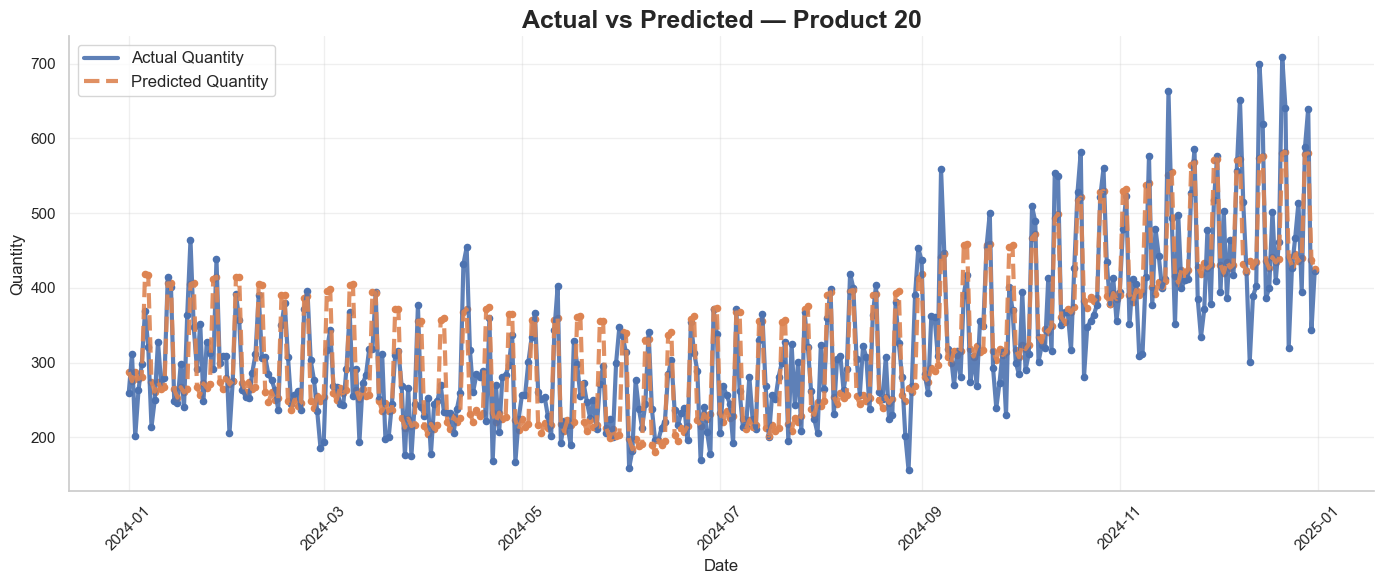

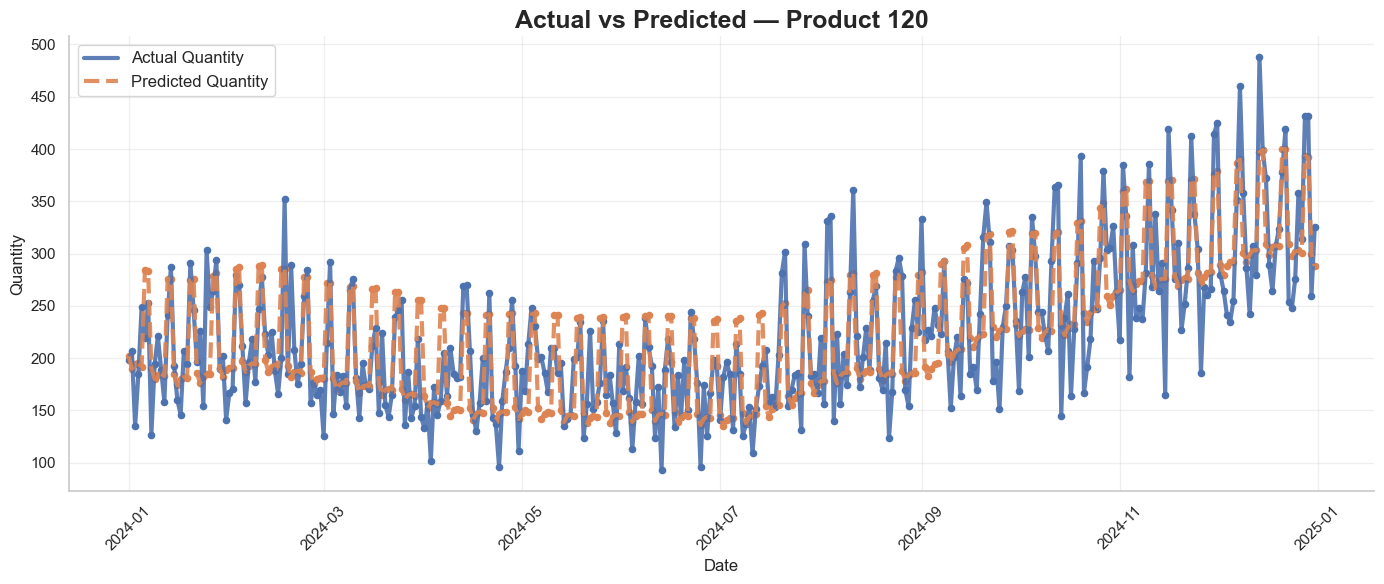

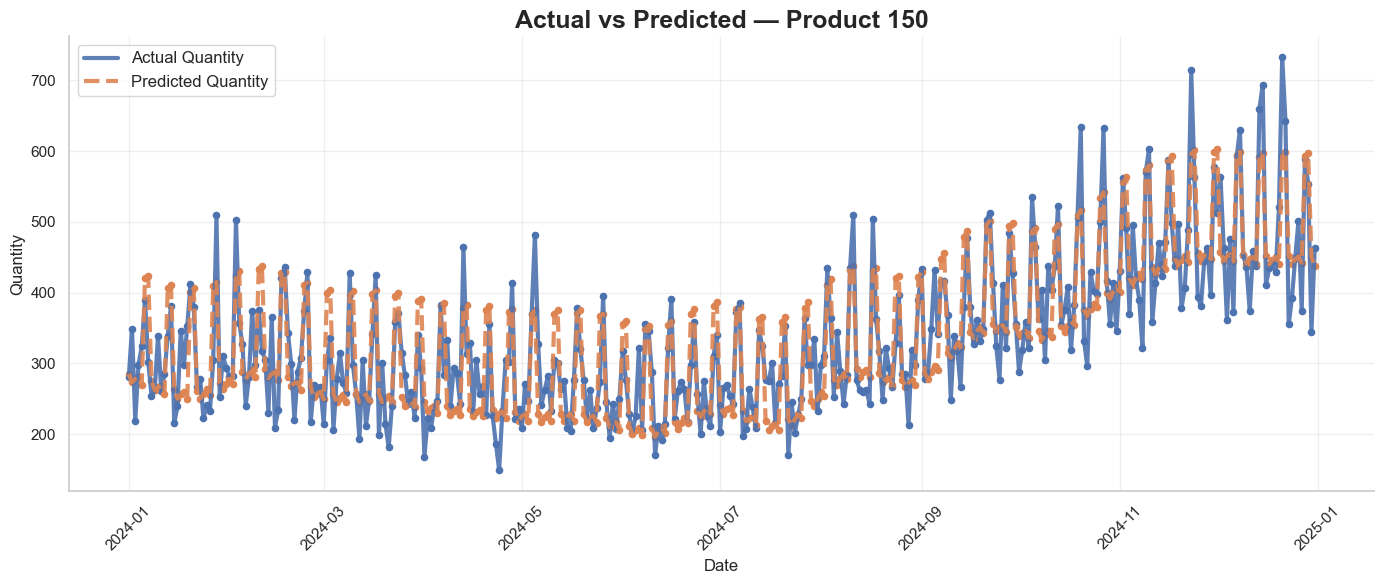

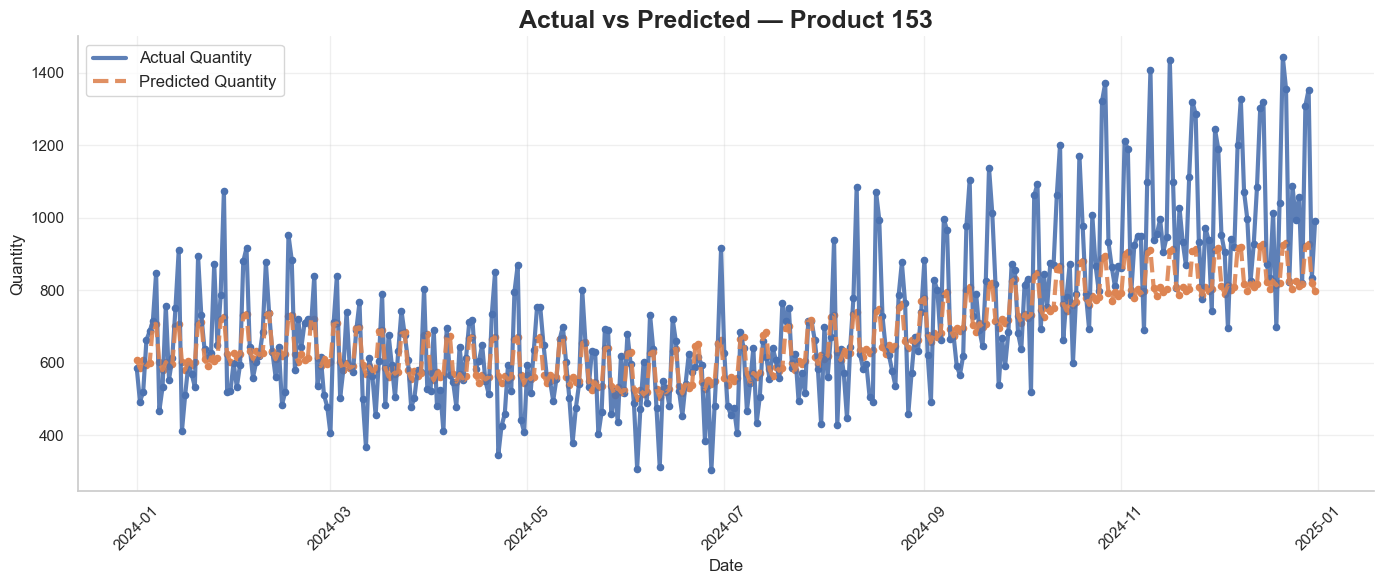

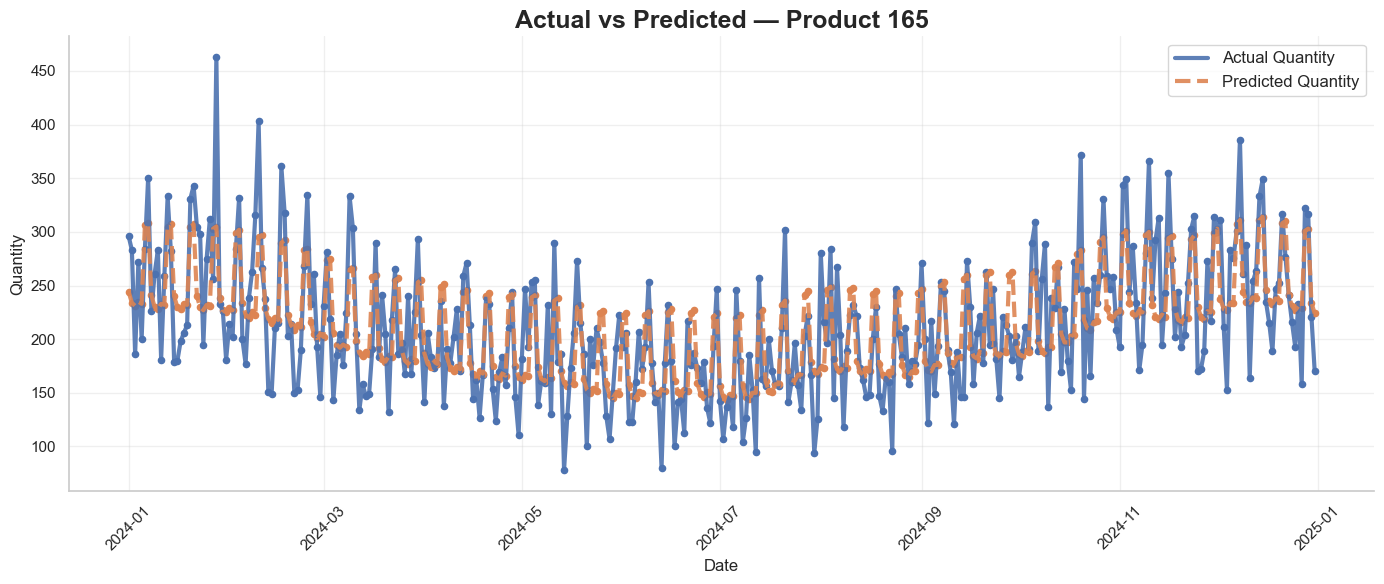

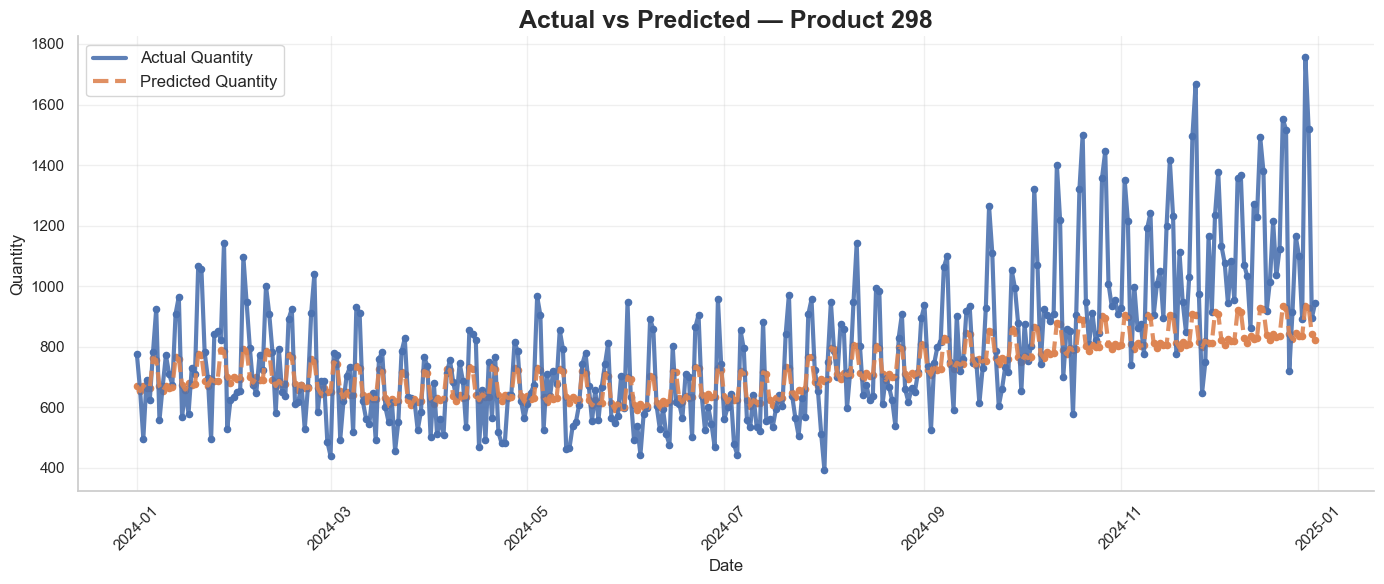

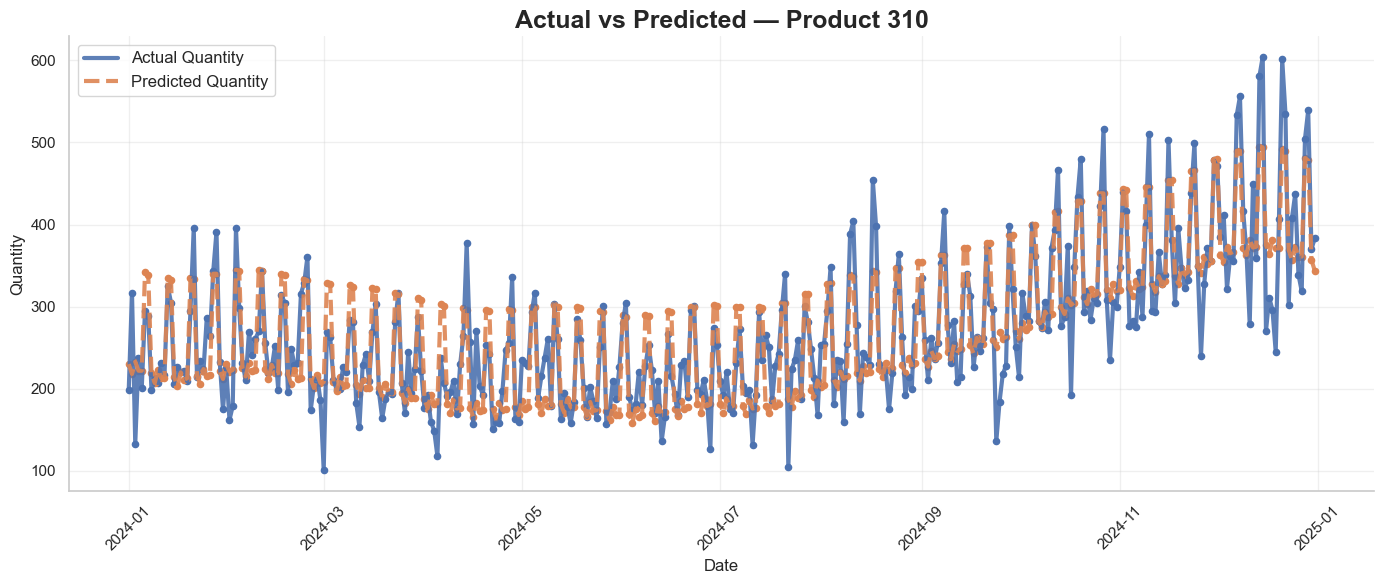

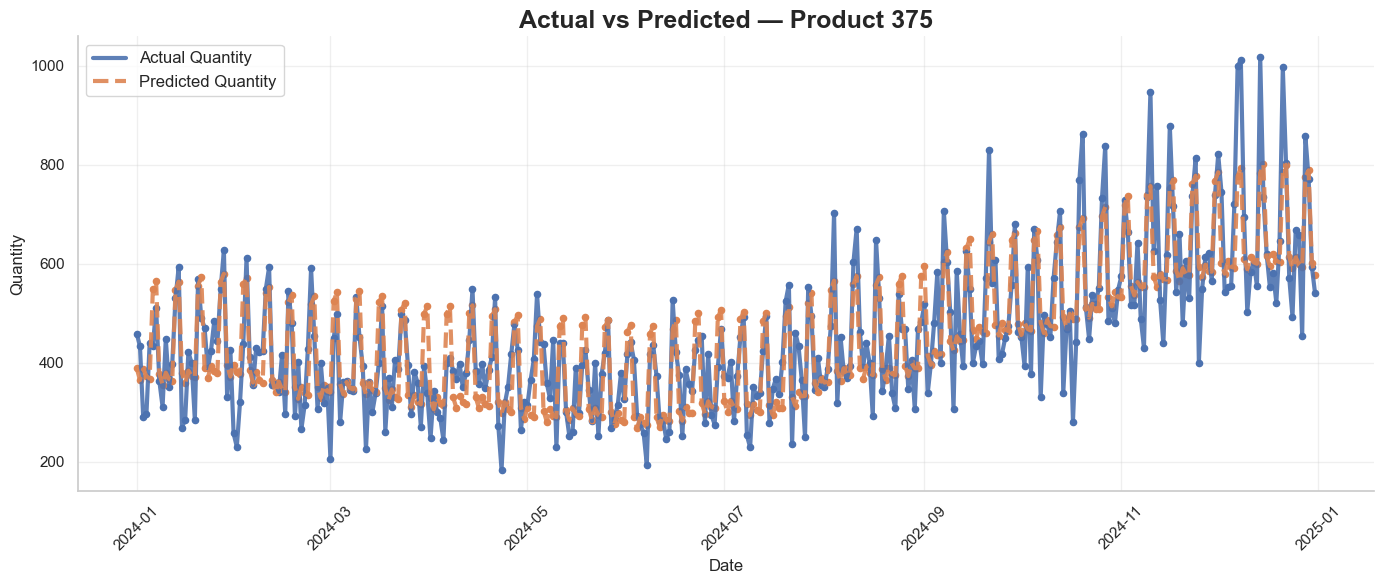

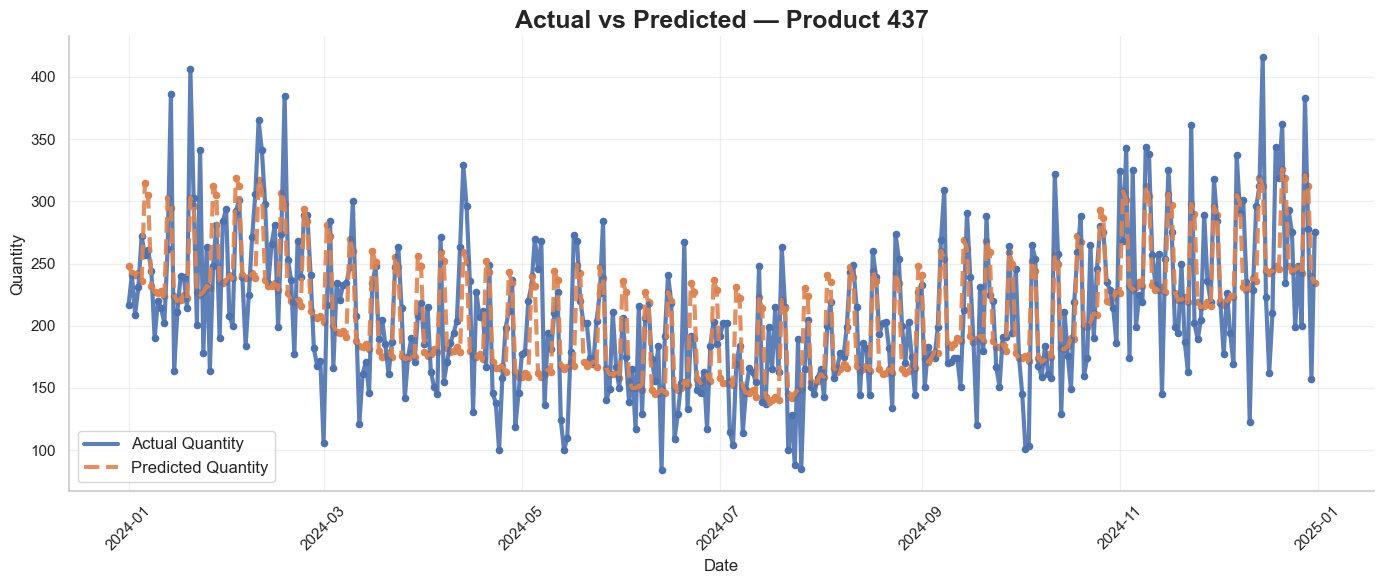

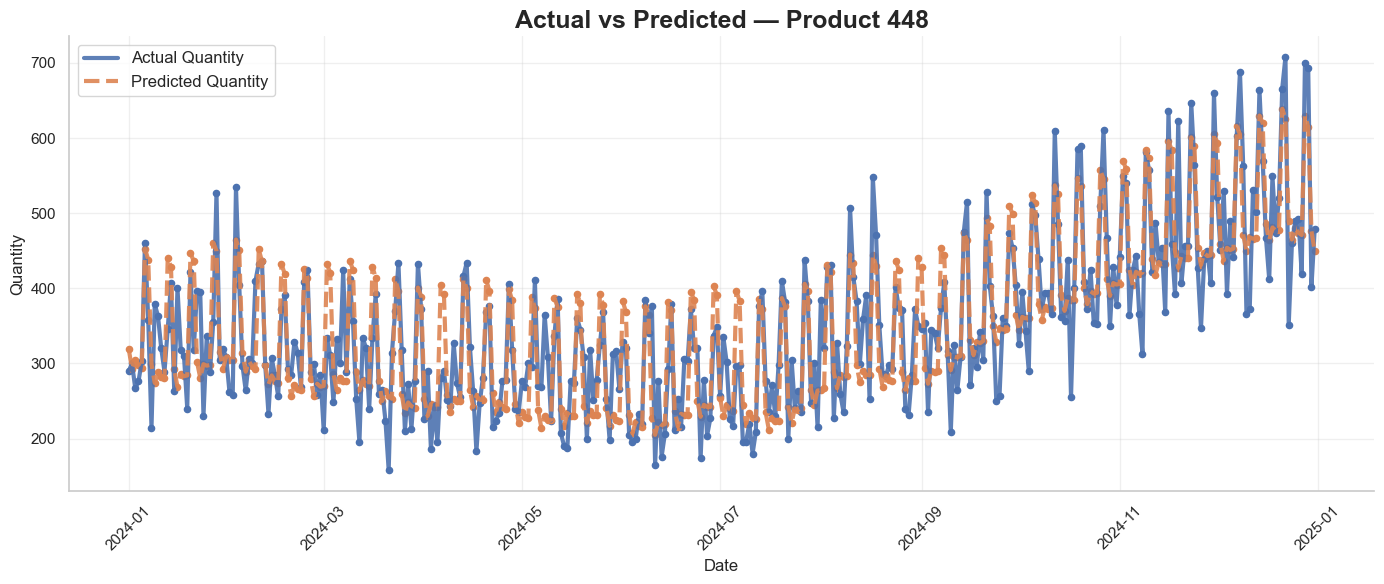

In [30]:
for pid in unique_products:
    plot_product_pro(pid)
